# Create a file to monitor your wallet balance 
## Then using that data to create plot.
The `wallet` executable created will append data in a json format to file > wallet.balance

## Creating the bash `wallet` executable:
This file will build the data resource > wallet.balance  <br /> <br />
Do not forget to make this file executable: chmod +x wallet <br />
If you cp or sym-link wallet to `/usr/bin` it can be used in a cron job <br />
( on my computer a file in `/usr/local/bin` will not be executed in a cron job )

In [ ]:
%%writefile wallet
#!/bin/bash
# do not forget to make this file executable: chmod +x wallet
# if you cp or symlink wallet to /usr/bin it can be used in a cron job
#echo curly brackets and the date into the datafile > wallet.balance
echo "{ \"Date\": `date +%s`," >>/home/jack/wallet.balance
# sent the results of the command: lbrynet wallet balance into the file > wallet.balance
lbrynet wallet balance >>/home/jack/wallet.balance 
# echo and ending curly-brackets to  > wallet.balance
echo "}" >>/home/jack/wallet.balance
# Then look at > wallet.balance
cat /home/jack/wallet.balance

# Run this to set up your directory tree

In [ ]:
if not os.path.exists('images'):
    os.makedirs('images')
if not os.path.exists('post'):
    os.makedirs('post')

The results of the above file being executed will append the wallet.balance in the following format: <br /> <br />
`{ "Date": 1579732895,
{
  "available": "0.1950495",
  "reserved": "14335.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7214.31"
  },
  "total": "14335.6630495"
}
}`    

## The result of the `wallet` being executed 

In [43]:
# The result of the `wallet` being executed 
# Each time it is run it will append the wallet.balance file
# This may be set up torun as a cron job
!wallet

{
  "available": "703.7053835",
  "reserved": "9564.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4789.0"
  },
  "total": "10268.2083835"
}
{
  "available": "703.7053835",
  "reserved": "9616.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4841.0"
  },
  "total": "10320.2083835"
}
{
  "available": "704.7053835",
  "reserved": "9616.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4841.0"
  },
  "total": "10321.2083835"
}
{
  "available": "704.7053835",
  "reserved": "9618.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4843.0"
  },
  "total": "10323.2083835"
}
{
  "available": "724.7053835",
  "reserved": "9618.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4843.0"
  },
  "total": "10343.2083835"
}
{
  "available": "723.7052425",
  "reserved": "978

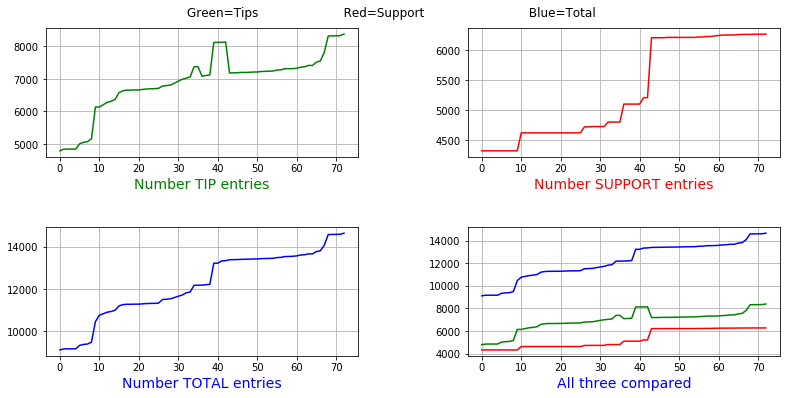

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

plt.figure(figsize=(12, 5))
#fig, ax = plt.subplots()
plt.subplot(221)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.xlabel('Number TIP entries', fontsize=14, color='green')
plt.subplot(222)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.xlabel('Number SUPPORT entries', fontsize=14, color='red')
plt.subplot(223)
plt.grid(True)
plt.plot(t, S+s, color='blue')
plt.xlabel('Number TOTAL entries', fontsize=14, color='blue')
#ax.plot(t, S+s, color='blue')
plt.subplot(224)
plt.grid(True)
plt.plot(t, s, color='green')
plt.plot(t, S+s, color='blue')
plt.plot(t, S, color='red')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
plt.xlabel('All three compared', fontsize=14, color='blue')

plt.subplots_adjust(top=0.92, bottom=0.01, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)

plt.show()


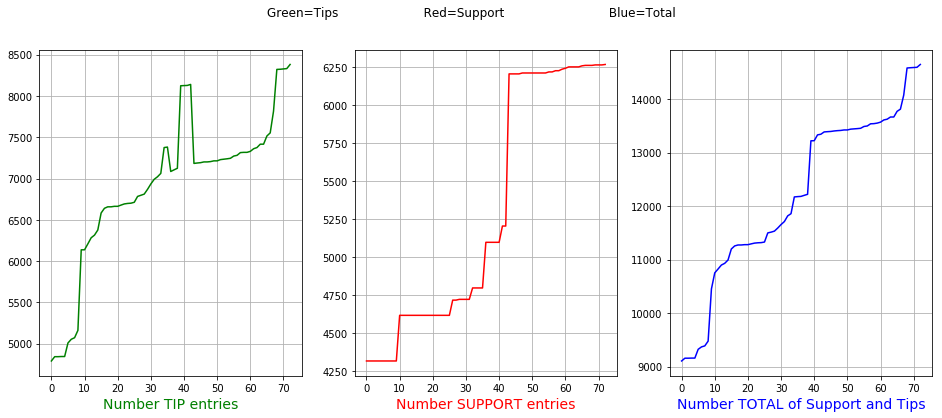

In [2]:
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(16, 6))
#fig, ax = plt.subplots()
plt.subplot(131)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.xlabel('Number TIP entries', fontsize=14, color='green')
plt.subplot(132)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.xlabel('Number SUPPORT entries', fontsize=14, color='red')
plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')
#ax.plot(t, S+s, color='blue')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
plt.xlabel('Number TOTAL of Support and Tips', fontsize=14, color='blue')
plt.ylabel='Values (LBC)'
#ax.set(xlabel='time (t)', ylabel='Values (LBC)',
#       title='Blue=Total / Green=Tips / Red=Support')
#plt.subplot(231)(t, S, color='red')
plt.show()


## Notice the change in the green and the red
Notice the change (drop) in the green (Tips) and the increase in the red (Supports) <br />
I moved some tips to support 

<Figure size 864x576 with 0 Axes>

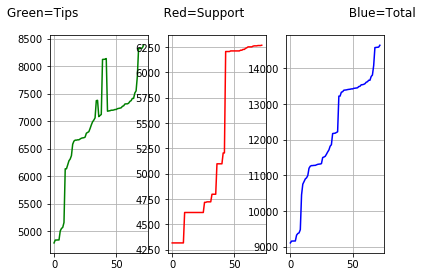

In [3]:
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
plt.subplot(131)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.subplot(132)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')
#ax.plot(t, S+s, color='blue')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
ax.set(xlabel='time (t)', ylabel='Values (LBC)',
       title='Blue=Total / Green=Tips / Red=Support')
plt.show()


# This data is new and is being run in a cron job

# %load /home/jack/wallet2.balance
{ "Date": 1579654802,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579658401,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579662001,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}


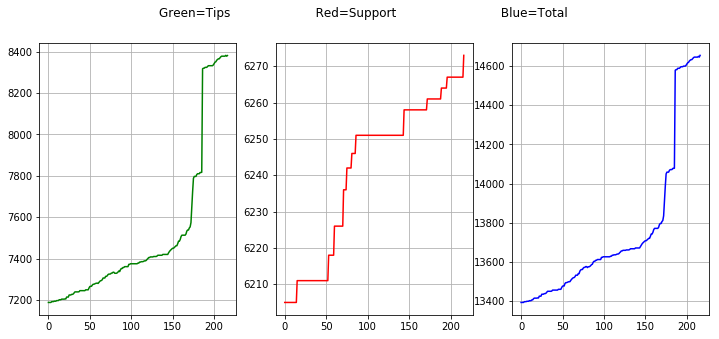

In [5]:
f = open("/home/jack/wallet2.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.grid(True)
plt.plot(t, s, color='green')

plt.subplot(132)
plt.grid(True)
plt.plot(t, S, color='red')

plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')

plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
ax.set(xlabel='time (t)', ylabel='Values (LBC)',
       title='Blue=Total / Green=Tips / Red=Support')
plt.show()


images/202001311048test.png


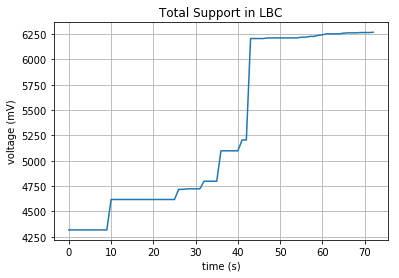

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import time
DT = time.strftime("%Y%m%d%H%M")
f = open("/home/jack/wallet.balance").readlines()
x = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

# Data for plotting
t=range(0,len(x))
s = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Total Support in LBC')
ax.grid()
filename = "images/"+DT+"test.png"
print filename
fig.savefig(filename)

plt.show()

In [7]:
import time
DT = time.strftime("%Y-%m-%d-%H:%M")
print DT

2020-01-31-10:48


Green = Supports
Blue = Tips
images/202001311048-test1.png   images/202001311048-full.png


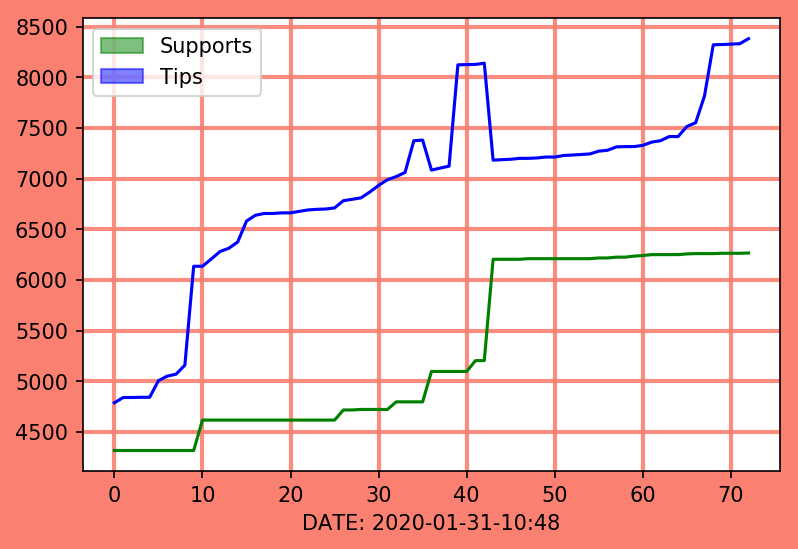

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import matplotlib.patches as mpatches
DT = time.strftime("%Y-%m-%d-%H:%M")
# use for filename
dt = time.strftime("%Y%m%d%H%M-")
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))        
        
# Data for plotting
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

fig, ax = plt.subplots(dpi=150)
ax.grid(color = "salmon", alpha = .9, linewidth = 2)

red_patch = mpatches.Patch(color='green', alpha = .5, label='Supports')
blue_patch = mpatches.Patch(color='blue', alpha = .5, label='Tips')
plt.legend(handles=[red_patch, blue_patch])
ax.set(xlabel='DATE: '+DT)
'''
ax.set(xlabel='DATE: '+DT+'  Samples(Scale = '+NumOfSamples+' samples)   Dropout '+ Dropout, ylabel='Last Training Loss: '+Trainingloss,
       title='Plot Losses from Last '+NumOfSamples+' Samples.   Epoch: '+Epoch+' \n Last: EvaluationLoss: \
'+Evaluationloss+"    LearningRate: "+LearningRate )
'''
print "Green = Supports"
print "Blue = Tips"
fig.patch.set_facecolor('salmon')
#plt.plot(yinc, y, color= 'green', alpha = .5)
#plt.plot(yinc, y, color= 'red', alpha = .5)
plt.plot(t, s, color= 'blue')
plt.plot(t, S, color= 'green')
filename = "images/"+dt+"test1.png"
filename0 = "images/"+dt+"full.png"
print filename," ",filename0
fig.savefig(filename)
plt.savefig(filename0 , bbox_inches="tight", facecolor="salmon")

plt.show()

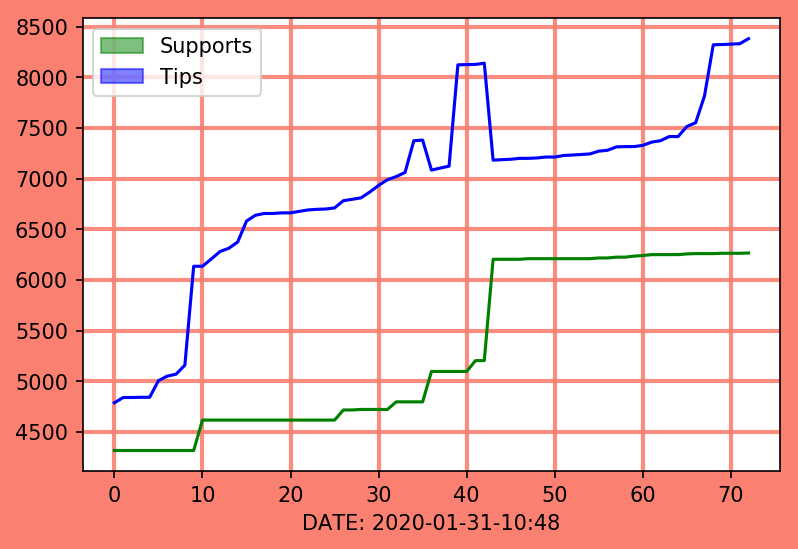

In [12]:
import os
from glob import glob
from PIL import Image
files = glob('images/*full.png') # * means all *full.png
filename = max(files, key=os.path.getctime)
IMG = Image.open(filename)
IMG

## Very little data history > wallet2.balance

Green = Supports
Blue = Tips


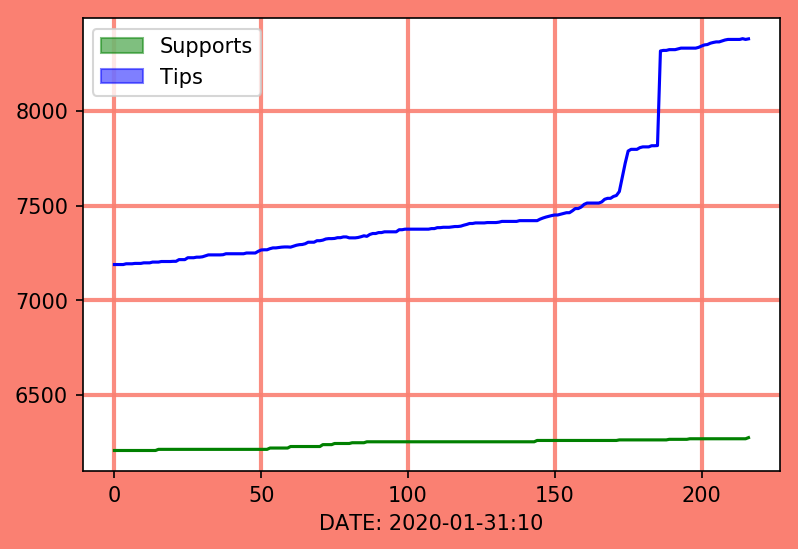

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import matplotlib.patches as mpatches
DT = time.strftime("%Y-%m-%d:%H")
dt = time.strftime("%Y%m%d%H%M-")
f = open("/home/jack/wallet2.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))        
        
# Data for plotting
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

fig, ax = plt.subplots(dpi=150)
ax.grid(color = "salmon", alpha = .9, linewidth = 2)

red_patch = mpatches.Patch(color='green', alpha = .5, label='Supports')
blue_patch = mpatches.Patch(color='blue', alpha = .5, label='Tips')
plt.legend(handles=[red_patch, blue_patch])
ax.set(xlabel='DATE: '+DT)
'''
ax.set(xlabel='DATE: '+DT+'  Samples(Scale = '+NumOfSamples+' samples)   Dropout '+ Dropout, ylabel='Last Training Loss: '+Trainingloss,
       title='Plot Losses from Last '+NumOfSamples+' Samples.   Epoch: '+Epoch+' \n Last: EvaluationLoss: \
'+Evaluationloss+"    LearningRate: "+LearningRate )
'''
print "Green = Supports"
print "Blue = Tips"
fig.patch.set_facecolor('salmon')
#plt.plot(yinc, y, color= 'green', alpha = .5)
#plt.plot(yinc, y, color= 'red', alpha = .5)
plt.plot(t, s, color= 'blue')
plt.plot(t, S, color= 'green')

#fig.savefig("test.png")
#plt.savefig(dt+'wallet_crone.png', bbox_inches="tight", facecolor="salmon")

plt.show()

In [41]:
!ls

5279.db				      LBRYDATA.db
9200.data			      LBRY_DLOAD
BaseImage			      LBRY-Python-Place-Data-in-Database.ipynb
blobfilesize			      lbry-transactions-history.csv
blobsize			      Monitor
CaPplay				      Plots-Graphs.ipynb
claim_search			      post
cleaned.json			      README.md
comment_list.db			      retrieve-video-from-database.ipynb
Completed.py			      search_data
Completed.pyc			      SignBaseImage
CREATEimage			      support_list.db
crytonator			      test-transactio.json
data.json			      test-transaction.json
DownloadDirectory		      transaction_list.db
GetGitSize			      wallet
How-to-get-transaction-history.ipynb  watchVID.py
images				      watchVID.pyc


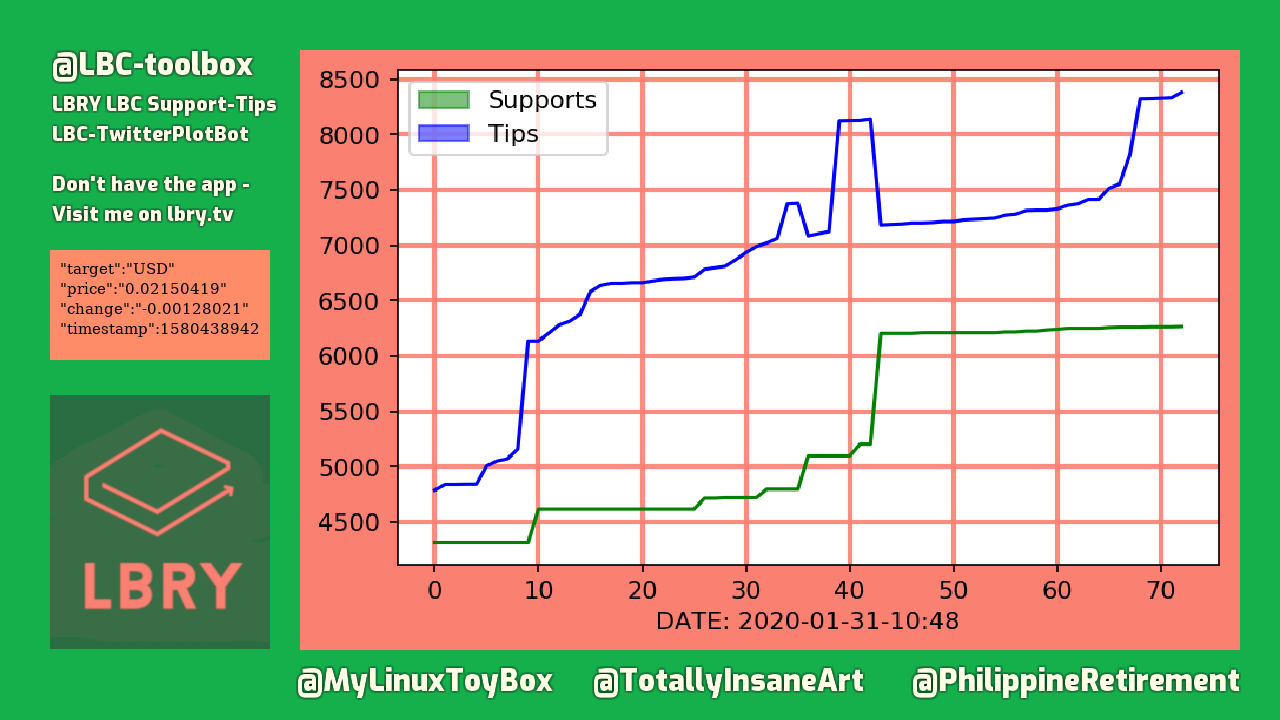

In [14]:
# %load SignBaseImage
#!/usr/bin/python2
"""
Some imports are not needed, but are for future use. markovify will be used to generate status for 
the LBRY TwitterBot.
"""
import random
from random import randint
import subprocess
import time
#import markovify
import os
import sys
from glob import glob
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
#creates directories if they do not exist
if not os.path.exists('images'):
    os.makedirs('images')
if not os.path.exists('post'):
    os.makedirs('post')
#gets a list of all files in a directory    
all_files = glob('images/*full.png') # * means all *full.png
#find the file with the latest date
filename0 = max(all_files, key=os.path.getctime)
dt = time.strftime("%Y%m%d%H%M-")

bashCommand = "curl https://api.cryptonator.com/api/ticker/lbc-usd >crytonator/cryptonator"
output = subprocess.check_output(['bash','-c', bashCommand])
data = open("crytonator/cryptonator").readlines()
DATA = str(data).split(",")
     
img = Image.new('RGB', (220, 110), color = (255, 140, 105))
fnt = ImageFont.truetype('/home/jack/fonts/DejaVuSerif.ttf', 15)     
d = ImageDraw.Draw(img)
d.text((10,10), DATA[1], font=fnt, fill=(0,0,0))
d.text((10,30), DATA[2], font=fnt, fill=(0,0,0))
d.text((10,50), DATA[4][:-1], font=fnt, fill=(0,0,0))
d.text((10,70), DATA[5], font=fnt, fill=(0,0,0))
img.save("images/"+"pil_text.png")


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', (1280,720), (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    #inp = Image.open(filename0)
    inp = Image.new('RGBA', (1280,720), (21,175,75))
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black
    #textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_blurred_back(inp, (2, 24), "@LBC-toolbox", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    i2 = draw_blurred_back(i2, (2, 70), "LBRY LBC Support-Tips", font0, text_title, blur_title)    
    i2 = draw_blurred_back(i2, (2, 100), "LBC-TwitterPlotBot", font0, text_title, blur_title) 
    i2 = draw_blurred_back(i2, (2, 150), "Don't have the app -", font0, text_title, blur_title)
    i2 = draw_blurred_back(i2, (2, 180), "Visit me on lbry.tv", font0, text_title, blur_title) 

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    # get a drawing context
    signature_ = "@MyLinuxToyBox     @TotallyInsaneArt      @PhilippineRetirement" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+90
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 80
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    #out.save("images/TEMP_POST.png")
    background = Image.new('RGBA', (1280,720), (21,175,75))
    #txt=draw_blurred_back(background,(x,y), i2, fnt, text_sig, blur_sig)
    txt=draw_blurred_back(background,(x,y), signature_, fnt, text_sig, blur_sig)
    txt.paste(out, (50, 20))
    im2=Image.open(filename0)
    plot  = im2.resize((940,600) , Image.NEAREST)
    txt.paste(plot, (300,50))
    filename0 = "post/"+dt+"POST.png"
    txt.save(filename0, quality=95)
    
files = glob('post/*POST.png') # * means all *full.png
PATH = max(files, key=os.path.getctime)    
image = Image.open(PATH)
over = Image.open("images/pil_text.png")
over2 = Image.open("images/logo.png")
image.paste(over, (50,250))
image.paste(over2, (50,395))
filename = time.strftime("post/%Y%m%d%H%M-"+"final.png")
image.save(filename)
image

# Gets the last file in a directory

In [15]:
files = glob('images/*full.png') # * means all *full.png
filename0 = max(files, key=os.path.getctime)
print files

['images/202001300650-full.png', 'images/202001290802-full.png', 'images/202001290814-full.png', 'images/202001301200-full.png', 'images/202001311048-full.png']
